<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [60]:
start = pd.to_datetime('2019-06-15')
end = pd.to_datetime('2021-06-14')

In [71]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

In [72]:
spy_etf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,290.220001,289.179993,289.519989,289.369995,39205700.0,279.100006
2019-06-18,293.570007,290.989990,291.390015,292.399994,85434800.0,282.022430
2019-06-19,293.649994,291.470001,292.549988,293.059998,78674400.0,282.658997
2019-06-20,296.309998,293.130005,296.040009,295.859985,116570000.0,285.359589
2019-06-21,295.519989,293.760010,294.130005,294.000000,83309500.0,284.944824
...,...,...,...,...,...,...
2021-06-07,422.779999,421.190002,422.589996,422.190002,51555000.0,422.190002
2021-06-08,423.209991,420.320007,423.109985,422.279999,47134300.0,422.279999
2021-06-09,423.260010,421.410004,423.179993,421.649994,48436300.0,421.649994


In [73]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2019-06-17 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       502 non-null    float64
 1   Low        502 non-null    float64
 2   Open       502 non-null    float64
 3   Close      502 non-null    float64
 4   Volume     502 non-null    float64
 5   Adj Close  502 non-null    float64
dtypes: float64(6)
memory usage: 27.5 KB


In [74]:
aapl = web.DataReader('AAPL', 'yahoo',start,end)
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,48.740002,48.042500,48.224998,48.472500,58676400.0,47.580223
2019-06-18,50.072498,48.802502,49.012501,49.612499,106204000.0,48.699249
2019-06-19,49.970001,49.327499,49.919998,49.467499,84496800.0,48.556911
2019-06-20,50.152500,49.507500,50.092499,49.865002,86056000.0,48.947098
2019-06-21,50.212502,49.537498,49.700001,49.695000,191202400.0,48.780224
...,...,...,...,...,...,...
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997


In [75]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2019-06-17 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       502 non-null    float64
 1   Low        502 non-null    float64
 2   Open       502 non-null    float64
 3   Close      502 non-null    float64
 4   Volume     502 non-null    float64
 5   Adj Close  502 non-null    float64
dtypes: float64(6)
memory usage: 27.5 KB


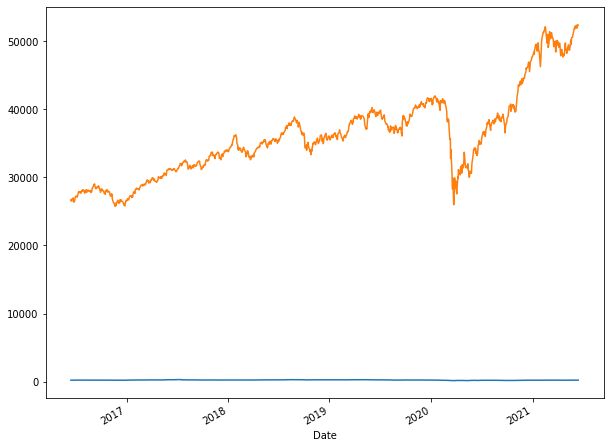

In [44]:
aapl['Adj Close'].plot(label = 'AAPL', figsize=(10,8))
spy_etf['Adj Close'].plot(label = 'SPY', figsize=(10,8))

In [45]:
aapl['Cummalative'] = aapl['Adj Close'] / aapl['Adj Close'].iloc[0]
spy_etf['Cummalative'] = spy_etf['Adj Close'] / spy_etf['Adj Close'].iloc[0]

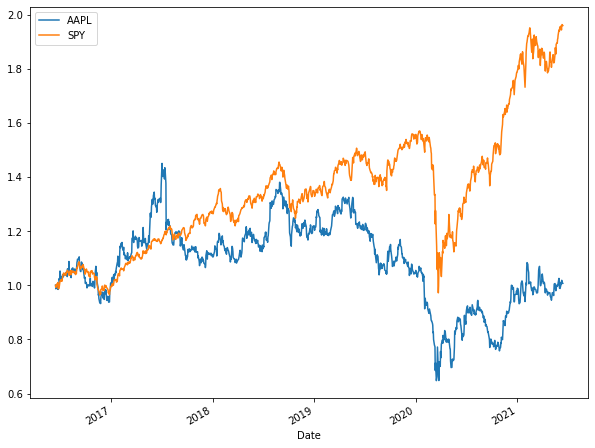

In [46]:
aapl['Cummalative'].plot(label = 'AAPL', figsize=(10,8))
spy_etf['Cummalative'].plot(label = 'SPY', figsize=(10,8))
plt.legend()

In [76]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

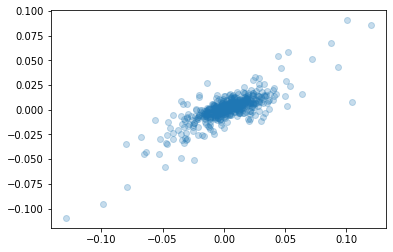

In [77]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'],alpha=0.25)

Using linear regression to check the correlation between SPY and AAPL stocks

In [21]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

A high beta value of around 1 indicates strong correlation

In [22]:
beta

0.4681510915998561

If the beta gets higher, the alpha value gets lower(towards negative -2ish) for highly correlated stocks

In [23]:
alpha

-1.3923953489303783e-05

In [24]:
r_value

0.7542545012078514

Introducing fake noise in the SPY data and comparing it with original SPY data to show the behaviour of highly correlated stocks

In [31]:
noise = np.random.normal(0,0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [27]:
noise

array([ 0.00024313, -0.00130966, -0.00051168, ...,  0.00047961,
        0.00027256, -0.00074264])

In [32]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

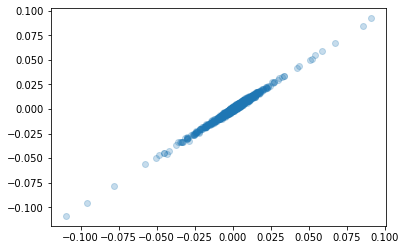

In [34]:
plt.scatter(spy_etf['Daily Return'].iloc[1:], fake_stock,alpha=0.25)

In [35]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [36]:
beta

0.9928710089760838

In [37]:
alpha

-2.1366359430637148e-05